## Seaborn
Seaborn est une bibliothèque Python spécialisée dans la visualisation statistique et elle est souvent utilisée pour des analyses de données exploratoires.

## 1. Installation et Importation de Seaborn
Assurez-vous que Seaborn est installé et importé avec d'autres bibliothèques nécessaires :

In [482]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [483]:
# Importation
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


## 2. Chargement et Préparation du Dataset Iris
Le dataset Iris est intégré dans **sklearn**. Nous allons le charger et le transformer en DataFrame Pandas.

In [484]:
# Chargement du dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Ajout de la colonne des espèces
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Affichage des premières lignes
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## 3. Visualisations avec Seaborn
**3.1. Scatter Plot :**
Affichons la relation entre la longueur et la largeur des pétales, colorée par espèce.

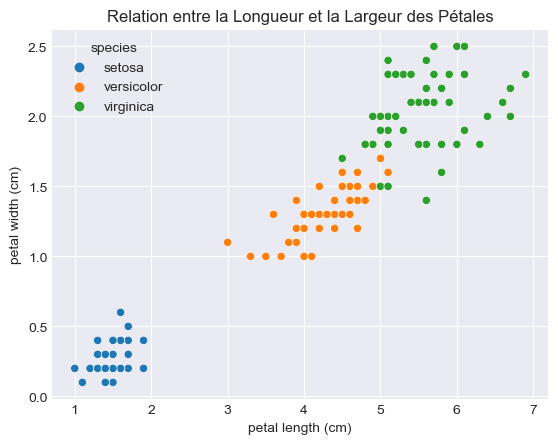

In [485]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df)
plt.title('Relation entre la Longueur et la Largeur des Pétales')
plt.show()

**3.2. Pair Plot :**
Le pair plot permet de visualiser toutes les relations entre les variables, et de différencier les observations par espèce.

C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


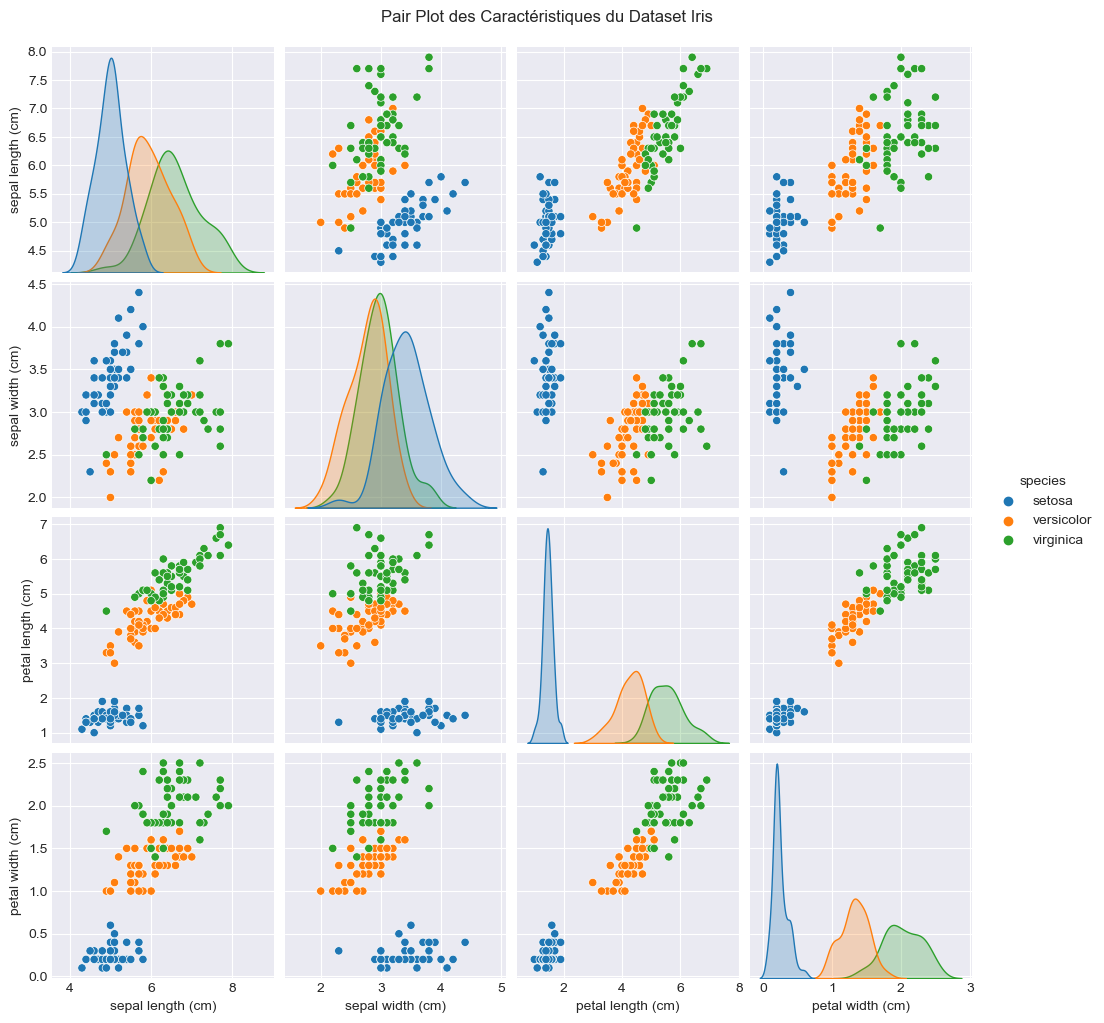

In [486]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot des Caractéristiques du Dataset Iris', y=1.02)
plt.show()

**3.3. Box Plot et Violin Plot**
* Box Plot
Comparons la distribution de la longueur des sépales entre les différentes espèces.

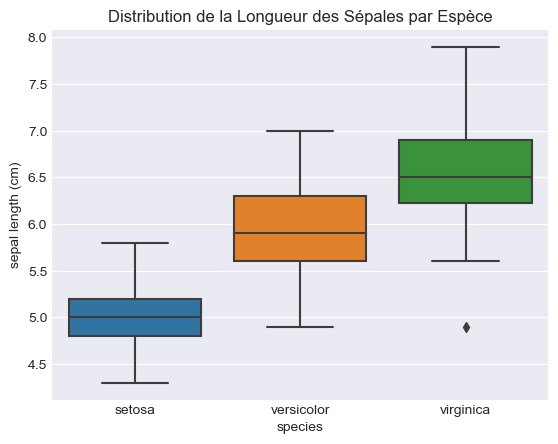

In [487]:
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Distribution de la Longueur des Sépales par Espèce')
plt.show()


* Violin Plot
Le violin plot montre à la fois la distribution des données et sa densité.

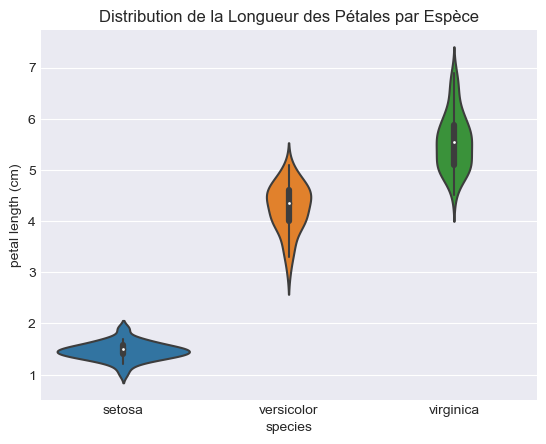

In [488]:
sns.violinplot(x='species', y='petal length (cm)', data=df)
plt.title('Distribution de la Longueur des Pétales par Espèce')
plt.show()


**3.4. Heatmap :**
Les heatmaps permettent de visualiser les matrices de corrélation. Voyons la corrélation entre les différentes caractéristiques.

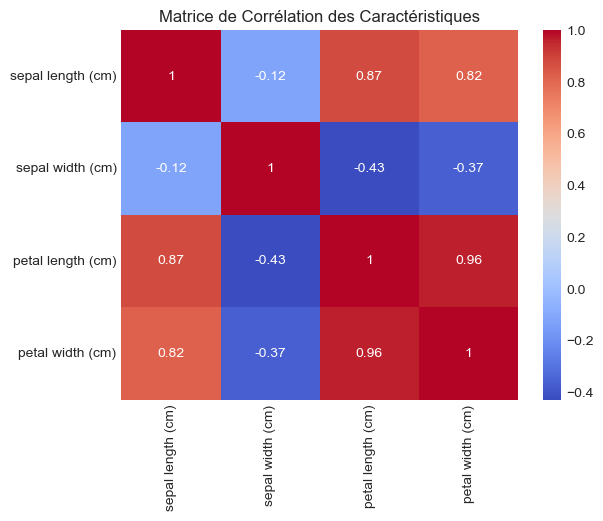

In [489]:
corr = df.drop(columns=['species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


**3.5. Joint Plot :**
Le joint plot combine des graphes univariés et bivariés pour examiner la relation entre deux variables.

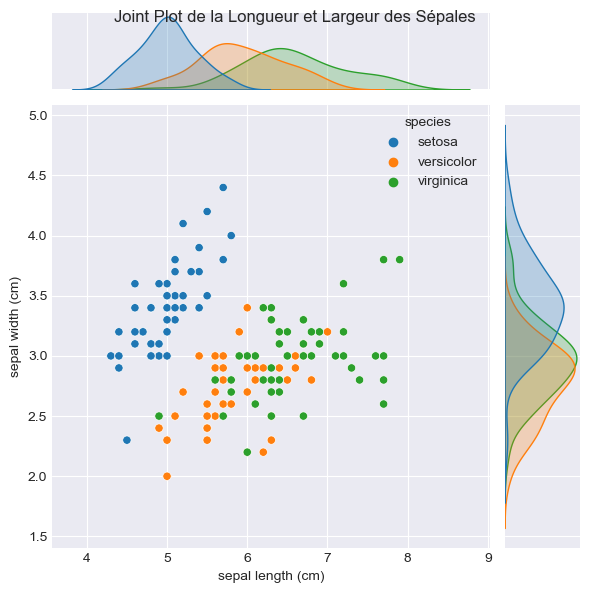

In [490]:
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df, kind='scatter', hue='species')
plt.suptitle('Joint Plot de la Longueur et Largeur des Sépales')
plt.show()


**3.6. Catplot :**
Les catplots sont utilisés pour représenter les relations entre une variable catégorielle et une variable numérique.

C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


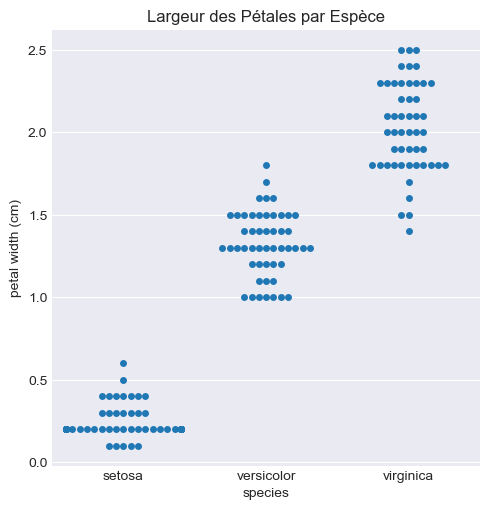

In [491]:
sns.catplot(x='species', y='petal width (cm)', kind='swarm', data=df)
plt.title('Largeur des Pétales par Espèce')
plt.show()


**3.7. FacetGrid :**
Le FacetGrid permet de créer des sous-ensembles de graphiques basés sur une variable catégorielle.

C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


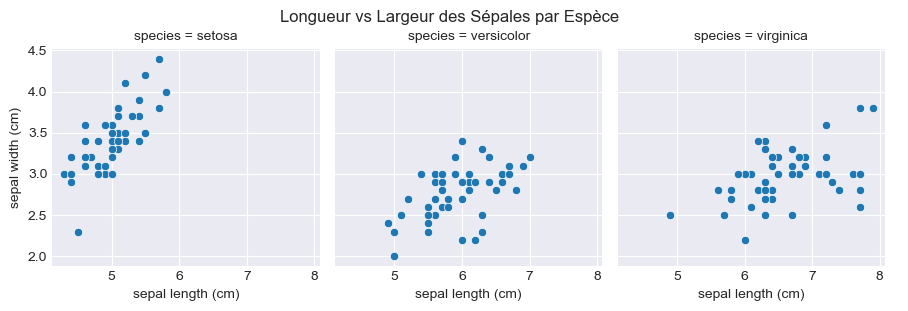

In [492]:
g = sns.FacetGrid(df, col='species')
g.map(sns.scatterplot, 'sepal length (cm)', 'sepal width (cm)')
g.add_legend()
plt.suptitle('Longueur vs Largeur des Sépales par Espèce', y=1.02)
plt.show()


**3.8. KDE Plot :**
Le KDE plot (Estimation de Densité de Noyau) est utile pour visualiser la distribution des données de manière lissée.

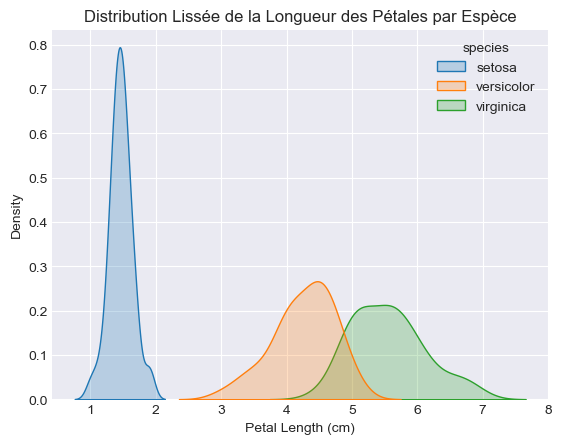

In [495]:
# Reformatage des données en forme longue
df_long = df.melt(id_vars="species", var_name="measurement", value_name="value")

# Filtrage pour "petal length (cm)"
df_petal_length = df_long[df_long['measurement'] == 'petal length (cm)']

# Plot KDE avec données reformattées
sns.kdeplot(data=df_petal_length, x="value", hue="species", fill=True)
plt.title('Distribution Lissée de la Longueur des Pétales par Espèce')
plt.xlabel('Petal Length (cm)')
plt.show()


**3.9. PairGrid :**
Le PairGrid est une version plus flexible du pair plot, qui permet de personnaliser chaque aspect des plots.

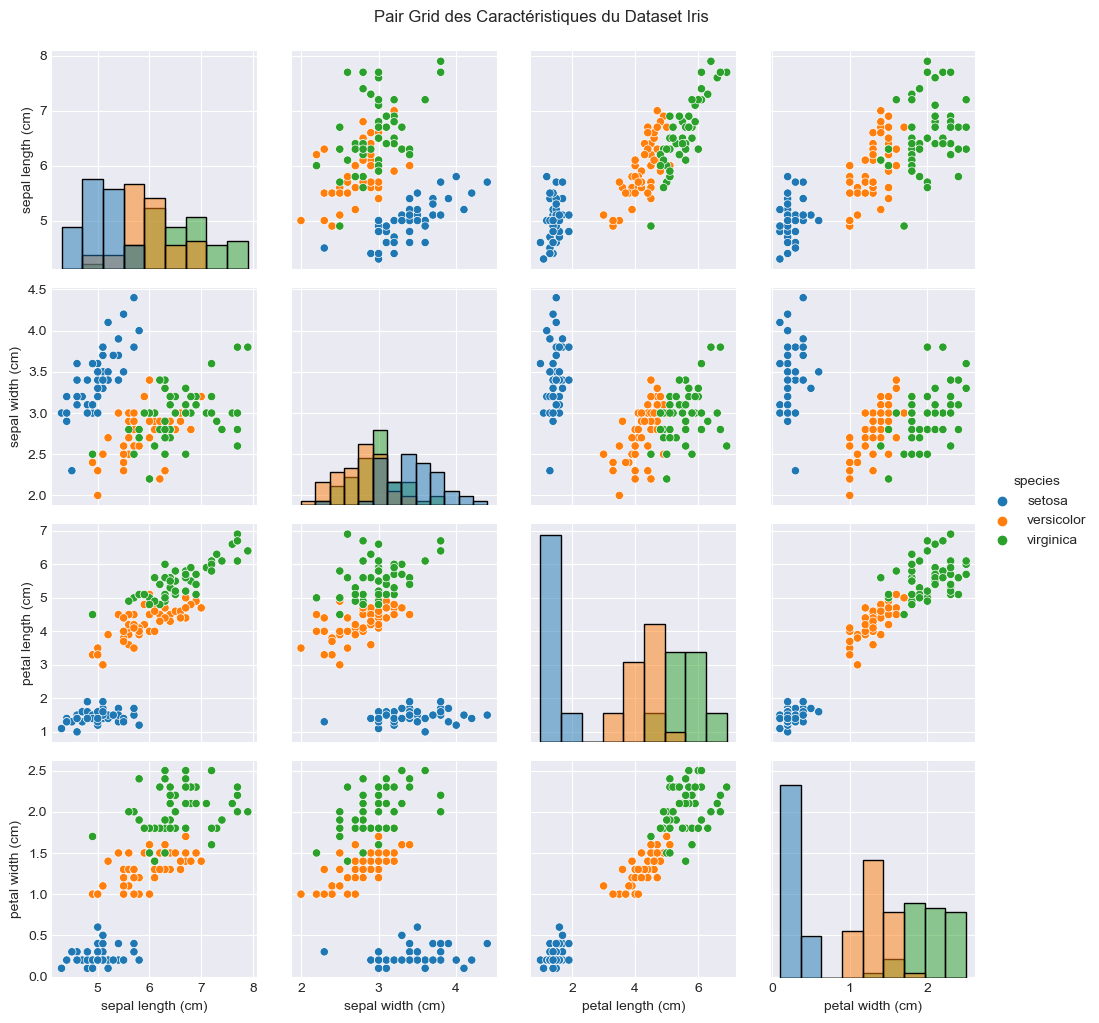

In [496]:
g = sns.PairGrid(df, hue='species')
g.map_diag(sns.histplot, kde_kws={"shade": True})
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle('Pair Grid des Caractéristiques du Dataset Iris', y=1.02)
plt.show()


**3.10. Bar Plot :**
Les bar plots permettent de comparer des moyennes ou d’autres statistiques agrégées.

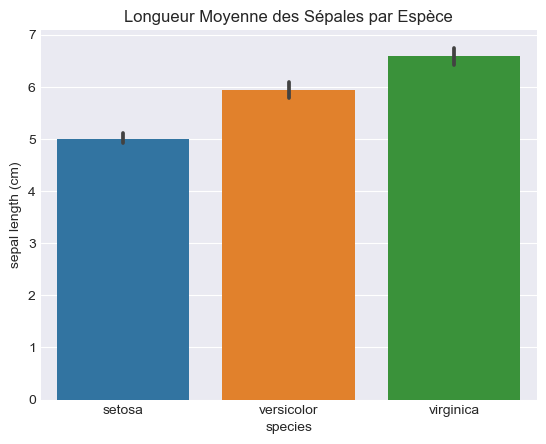

In [497]:
sns.barplot(x='species', y='sepal length (cm)', data=df)
plt.title('Longueur Moyenne des Sépales par Espèce')
plt.show()


## 4. Exercice Pratique
Exploration Complète du Dataset Iris avec Seaborn
* **Scatter Plot :** Créez un scatter plot pour comparer la largeur des sépales contre la longueur des sépales, coloré par espèce.
* **Pair Plot :** Générez un pair plot pour explorer toutes les relations entre les variables.
* **Violin Plot :** Affichez un violin plot de la largeur des pétales par espèce.
* **Heatmap :** Créez une heatmap pour visualiser la matrice de corrélation entre toutes les caractéristiques.
* **FacetGrid :** Utilisez FacetGrid pour afficher les relations entre la longueur et la largeur des pétales par espèce.

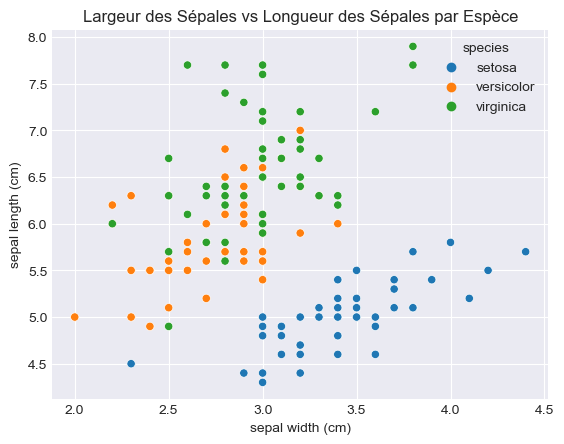

In [498]:
# Scatter Plot: Largeur des sépales vs Longueur des sépales
sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', hue='species', data=df)
plt.title('Largeur des Sépales vs Longueur des Sépales par Espèce')
plt.show()

C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


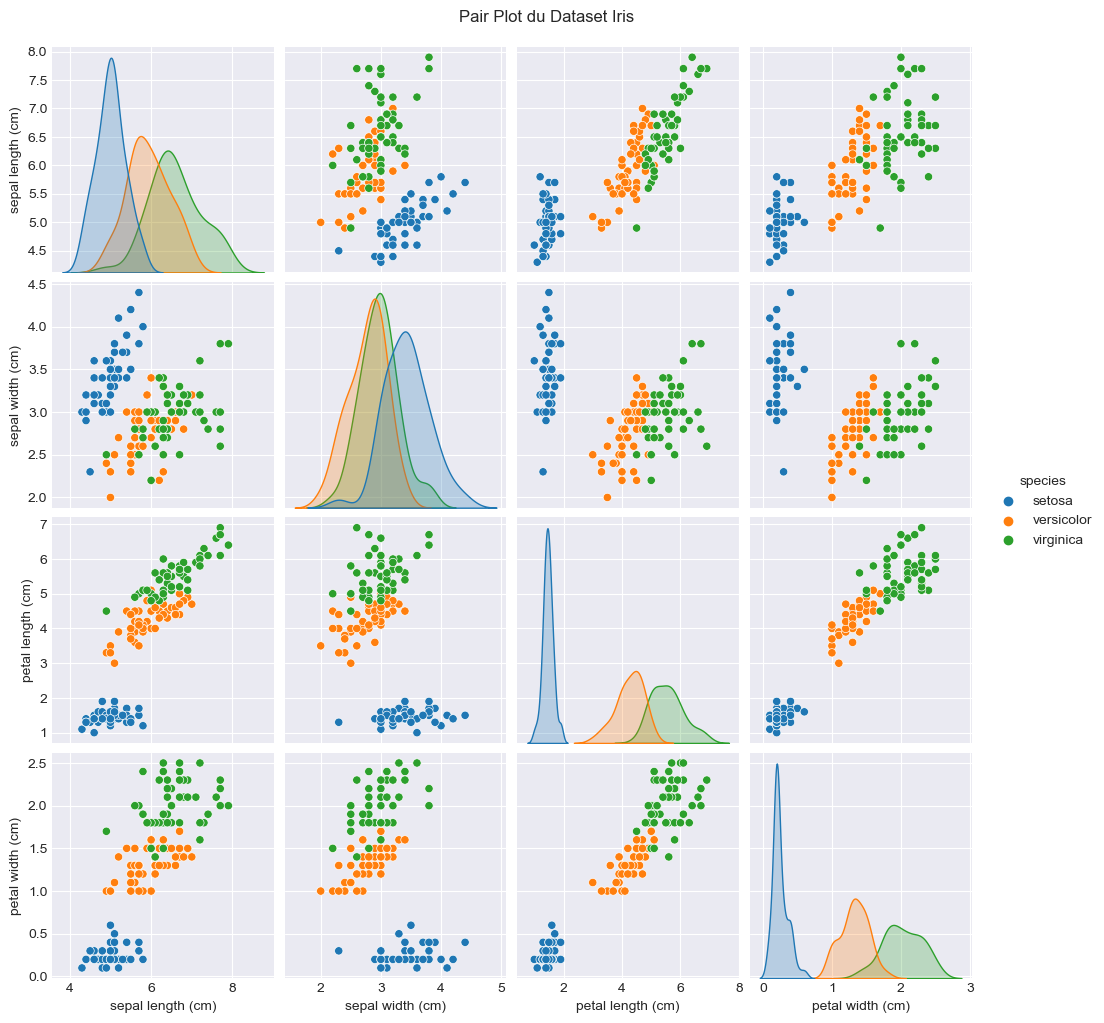

In [499]:
# Pair Plot
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot du Dataset Iris', y=1.02)
plt.show()

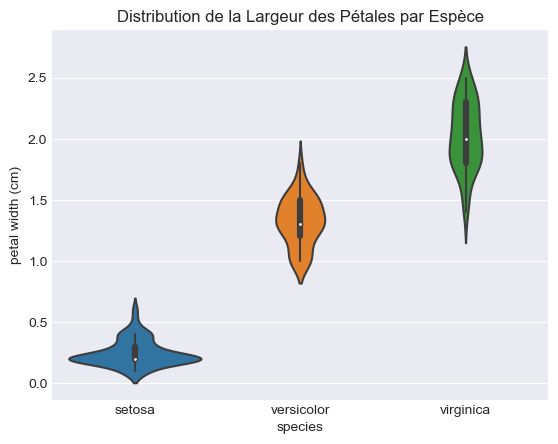

In [500]:
# Violin Plot: Largeur des pétales par espèce
sns.violinplot(x='species', y='petal width (cm)', data=df)
plt.title('Distribution de la Largeur des Pétales par Espèce')
plt.show()

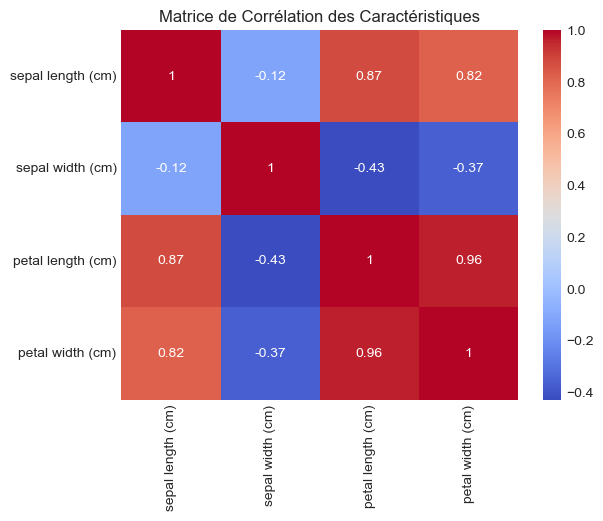

In [501]:
# Heatmap: Corrélation entre les caractéristiques
corr = df.drop(columns=['species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

C:\Users\tilus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


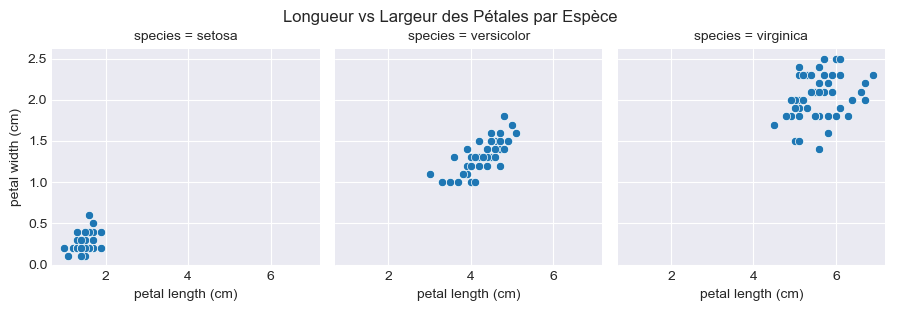

In [502]:
# FacetGrid: Longueur vs Largeur des pétales par espèce
g = sns.FacetGrid(df, col='species')
g.map(sns.scatterplot, 'petal length (cm)', 'petal width (cm)')
g.add_legend()
plt.suptitle('Longueur vs Largeur des Pétales par Espèce', y=1.02)
plt.show()